# mehmetfatihdata

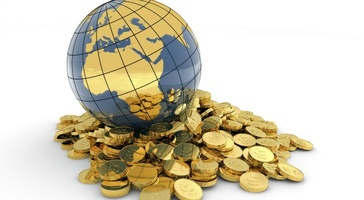

# Africa Economic, Banking and Systemic Crisis Data 
# Regression Project


In [1]:
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sklearn import linear_model

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

## 1. EDA
The dataset specifically focuses on the Banking, Debt, Financial, Inflation and Systemic Crises that occurred, from 1860 to 2014, in 13 African countries, including: Algeria, Angola, Central African Republic, Ivory Coast, Egypt, Kenya, Mauritius, Morocco, Nigeria, South Africa, Tunisia, Zambia and Zimbabwe.

In [2]:
df = pd.read_csv('dataset/african_crises.csv', index_col='case')
df.head(3)

,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
case,,,,,,,,,,,,,
1,DZA,Algeria,1870,1,0.052,0,0,0.000,3.441,0,0,0,crisis
1,DZA,Algeria,1871,0,0.053,0,0,0.000,14.149,0,0,0,no_crisis
1,DZA,Algeria,1872,0,0.052,0,0,0.000,-3.719,0,0,0,no_crisis


In [3]:
print("Checking the columns in the dataset.")
df.columns

Checking the columns in the dataset.


Index(['cc3', 'country', 'year', 'systemic_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
       'currency_crises', 'inflation_crises', 'banking_crisis'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1059 entries, 1 to 70
Data columns (total 13 columns):
cc3                                1059 non-null object
country                            1059 non-null object
year                               1059 non-null int64
systemic_crisis                    1059 non-null int64
exch_usd                           1059 non-null float64
domestic_debt_in_default           1059 non-null int64
sovereign_external_debt_default    1059 non-null int64
gdp_weighted_default               1059 non-null float64
inflation_annual_cpi               1059 non-null float64
independence                       1059 non-null int64
currency_crises                    1059 non-null int64
inflation_crises                   1059 non-null int64
banking_crisis                     1059 non-null object
dtypes: float64(3), int64(7), object(3)
memory usage: 115.8+ KB


In [5]:
df.isnull().sum()

cc3                                0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64

The Dataset has no null value.

In [6]:
df.describe()

,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
count,1059.000,1059.000,1059.000,1059.000,1059.000,1059.000,1059.000,1059.000,1059.000,1059.000
mean,1967.768,0.077,43.141,0.040,0.153,0.006,20848.892,0.776,0.132,0.129
std,33.531,0.267,111.475,0.195,0.360,0.044,675727.429,0.417,0.350,0.336
min,1860.000,0.000,0.000,0.000,0.000,0.000,-28.502,0.000,0.000,0.000
25%,1951.000,0.000,0.195,0.000,0.000,0.000,2.086,1.000,0.000,0.000
50%,1973.000,0.000,0.868,0.000,0.000,0.000,5.762,1.000,0.000,0.000
75%,1994.000,0.000,8.463,0.000,0.000,0.000,11.644,1.000,0.000,0.000
max,2014.000,1.000,744.306,1.000,1.000,0.400,21989695.220,1.000,2.000,1.000


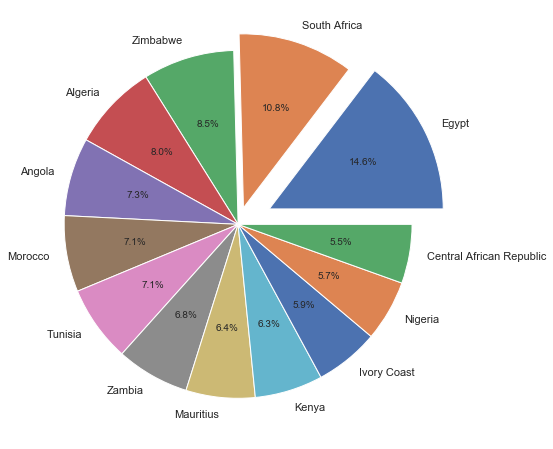

In [7]:
# Dataset is non-uniform and recently formed countries have least data
plt.figure(figsize=(8,8))
counts= df['country'].value_counts()
country=counts.index
explode = (0.2, 0.1, 0, 0, 0, 0, 0, 0 ,0, 0, 0, 0, 0)
plt.pie(counts, explode=explode,labels=country,autopct='%1.1f%%')
plt.show()

# 2. Which factors are most associated with exchange usd in Africa (Egypt&S.Africa) ?

In [8]:
EGY = pd.read_csv('dataset/EGY.csv')
EGY=EGY.drop(columns='GDP',axis=0)
EGY.head()

,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis_new
0,EGY,Egypt,1965,0,0.435,0,0,0.000,13.121,1,0,0,0
1,EGY,Egypt,1966,0,0.435,0,0,0.000,6.694,1,0,0,0
2,EGY,Egypt,1967,0,0.435,0,0,0.000,0.120,1,0,0,0
3,EGY,Egypt,1968,0,0.435,0,0,0.000,0.456,1,0,0,0
4,EGY,Egypt,1969,0,0.435,0,0,0.000,3.677,1,0,0,0


In [9]:
add = pd.read_csv('dataset/yeni.csv',index_col=0)
add.head(5)

,GDP,Per Capita,Growth,year
0,4.949,162.608,4.914,1965
1,5.278,168.963,5.046,1966
2,5.605,174.863,0.805,1967
3,5.932,180.411,-1.607,1968
4,6.524,193.586,5.279,1969


In [10]:
add = add.drop(columns='year',axis=0)
add = add.rename(columns={" Growth": "growth", " Per Capita": "per_capita", "GDP":"gdp"})

In [11]:
egy_new = pd.concat([EGY, add], axis=1)
egy_new

,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis_new,gdp,per_capita,growth
0,EGY,Egypt,1965,0,0.435,0,0,0.000,13.121,1,0,0,0,4.949,162.608,4.914
1,EGY,Egypt,1966,0,0.435,0,0,0.000,6.694,1,0,0,0,5.278,168.963,5.046
2,EGY,Egypt,1967,0,0.435,0,0,0.000,0.120,1,0,0,0,5.605,174.863,0.805
3,EGY,Egypt,1968,0,0.435,0,0,0.000,0.456,1,0,0,0,5.932,180.411,-1.607
4,EGY,Egypt,1969,0,0.435,0,0,0.000,3.677,1,0,0,0,6.524,193.586,5.279
5,EGY,Egypt,1970,0,0.435,0,0,0.000,3.369,1,0,0,0,8.042,233.014,5.598
6,EGY,Egypt,1971,0,0.435,0,0,0.000,2.943,1,0,0,0,8.609,243.807,4.057
7,EGY,Egypt,1972,0,0.435,0,0,0.000,2.424,1,0,0,0,9.300,257.589,3.056
8,EGY,Egypt,1973,0,0.435,0,0,0.000,5.740,1,0,0,0,10.099,273.699,3.507
9,EGY,Egypt,1974,0,0.391,0,0,0.000,10.640,1,0,0,0,9.229,244.747,1.559


In [12]:
egy_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 16 columns):
cc3                                50 non-null object
country                            50 non-null object
year                               50 non-null int64
systemic_crisis                    50 non-null int64
exch_usd                           50 non-null float64
domestic_debt_in_default           50 non-null int64
sovereign_external_debt_default    50 non-null int64
gdp_weighted_default               50 non-null float64
inflation_annual_cpi               50 non-null float64
independence                       50 non-null int64
currency_crises                    50 non-null int64
inflation_crises                   50 non-null int64
banking_crisis_new                 50 non-null int64
gdp                                50 non-null float64
per_capita                         50 non-null float64
growth                             50 non-null float64
dtypes: float64(6), int64(8), objec

In [13]:
egy_new.describe()

,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis_new,gdp,per_capita,growth
count,50.000,50.000,50.000,50.000,50.000,50.000,50.000,50.000,50.000,50.000,50.000,50.000,50.000,50.000
mean,1989.500,0.080,2.629,0.000,0.020,0.008,10.061,1.000,0.120,0.120,0.180,70.701,1009.828,5.048
std,14.577,0.274,2.321,0.000,0.141,0.057,6.250,0.000,0.328,0.328,0.388,78.284,852.935,2.690
min,1965.000,0.000,0.391,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,4.949,162.608,-1.607
25%,1977.250,0.000,0.435,0.000,0.000,0.000,5.216,1.000,0.000,0.000,0.000,14.504,357.520,3.514
50%,1989.500,0.000,1.550,0.000,0.000,0.000,10.001,1.000,0.000,0.000,0.000,40.855,771.750,4.917
75%,2001.750,0.000,4.498,0.000,0.000,0.000,12.868,1.000,0.000,0.000,0.000,89.227,1268.282,5.988
max,2014.000,1.000,7.150,0.000,1.000,0.400,25.185,1.000,1.000,1.000,1.000,305.530,3378.831,13.280


In [14]:
egy_new=egy_new.drop(columns=['independence','domestic_debt_in_default', 'gdp_weighted_default', 'sovereign_external_debt_default'],axis=0)

In [16]:
egy_new.corr().growth.abs().sort_values()

banking_crisis_new     0.006
inflation_crises       0.078
year                   0.139
currency_crises        0.169
per_capita             0.208
gdp                    0.235
exch_usd               0.275
inflation_annual_cpi   0.295
systemic_crisis        0.337
growth                 1.000
Name: growth, dtype: float64

(0, 10)

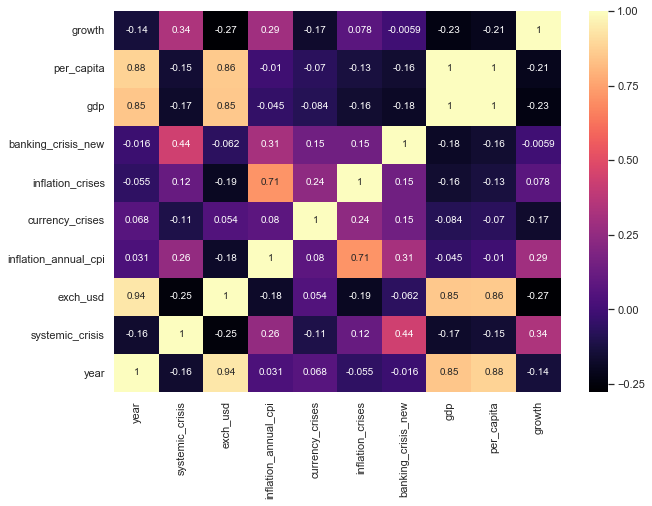

In [17]:
plt.figure(figsize=(10,7))
sns.heatmap(egy_new.corr(), cmap='magma', annot=True)
plt.ylim(0,10)

In [79]:
Y = egy_new['growth']
X = egy_new[['gdp','year', 'exch_usd','inflation_annual_cpi',
       'inflation_crises', 'banking_crisis_new', 'systemic_crisis','currency_crises']]

lrm_1 = linear_model.LinearRegression()
lrm_1.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 465)
print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 35
Test kümesindeki gözlem sayısı   : 15


In [81]:
X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 growth   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     1.990
Date:                Sat, 01 Feb 2020   Prob (F-statistic):             0.0885
Time:                        23:08:17   Log-Likelihood:                -76.316
No. Observations:                  35   AIC:                             170.6
Df Residuals:                      26   BIC:                             184.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -116.8589    251.166     -0.465      0.646    -633.137     399.419
gdp                     -0.0140      0.015     -0.908      0.372      -0.046       0.018
year                     0.0612      0.128      0.480      0.636      -0.201       0.324
exch_usd                -0.3167      0.824     -0.384      0.704      -2.011       1.378
inflation_annual_cpi     0.2742      0.141      1.947      0.062      -0.015       0.564
inflation_crises        -3.9325      1.967     -2.000      0.056      -7.975       0.110
banking_crisis_new      -1.8673      1.555     -1.201      0.241      -5.064       1.329
systemic_crisis          3.1626      2.434      1.300      0.205      -1.840       8.165
currency_crises         -1.2962      1.499     -0.865      0.395      -4.377       1.785
==============================================================================
Omnibus:                        4.971   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                4.005
Skew:                           0.437   Prob(JB):                        0.135
Kurtosis:                       4.408   Cond. No.                     1.19e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
egy_new['usd_year']= egy_new.exch_usd*egy_new.year

In [83]:
Y = egy_new['growth']
X = egy_new[['gdp','year', 'exch_usd','inflation_annual_cpi', 'usd_year',
       'inflation_crises', 'banking_crisis_new', 'systemic_crisis','currency_crises']]

lrm_2 = linear_model.LinearRegression()
lrm_2.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 465)
print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 35
Test kümesindeki gözlem sayısı   : 15


In [85]:
X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 growth   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     1.977
Date:                Sat, 01 Feb 2020   Prob (F-statistic):             0.0862
Time:                        23:08:32   Log-Likelihood:                -75.266
No. Observations:                  35   AIC:                             170.5
Df Residuals:                      25   BIC:                             186.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -328.3682    301.195     -1.090      0.286    -948.691     291.954
gdp                     -0.0417      0.027     -1.544      0.135      -0.097       0.014
year                     0.1695      0.153      1.105      0.280      -0.147       0.486
exch_usd              -164.7730    132.258     -1.246      0.224    -437.163     107.617
inflation_annual_cpi     0.2022      0.151      1.340      0.192      -0.109       0.513
usd_year                 0.0819      0.066      1.243      0.225      -0.054       0.217
inflation_crises        -3.5122      1.975     -1.778      0.088      -7.581       0.556
banking_crisis_new       0.3085      2.330      0.132      0.896      -4.491       5.108
systemic_crisis          1.0666      2.940      0.363      0.720      -4.988       7.121
currency_crises         -1.2694      1.483     -0.856      0.400      -4.325       1.786
==============================================================================
Omnibus:                        3.311   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.191   Jarque-Bera (JB):                2.266
Skew:                           0.234   Prob(JB):                        0.322
Kurtosis:                       4.155   Cond. No.                     4.69e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [129]:
egy_new['crises'] = egy_new.systemic_crisis*egy_new.inflation_annual_cpi
egy_new['inflation']= egy_new.inflation_crises*egy_new.inflation_annual_cpi

In [130]:
Y = egy_new['growth']
X = egy_new[['gdp','year', 'exch_usd','inflation_annual_cpi','usd_year','crises','inflation',
       'inflation_crises', 'systemic_crisis','currency_crises']]

lrm_3 = linear_model.LinearRegression()
lrm_3.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 465)
print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 35
Test kümesindeki gözlem sayısı   : 15


In [132]:
X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 growth   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     2.480
Date:                Sat, 01 Feb 2020   Prob (F-statistic):             0.0332
Time:                        23:29:24   Log-Likelihood:                -72.254
No. Observations:                  35   AIC:                             166.5
Df Residuals:                      24   BIC:                             183.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -331.2555    233.474     -1.419      0.169    -813.122     150.611
gdp                     -0.0416      0.022     -1.882      0.072      -0.087       0.004
year                     0.1709      0.119      1.439      0.163      -0.074       0.416
exch_usd              -166.8698     81.857     -2.039      0.053    -335.813       2.074
inflation_annual_cpi     0.2547      0.127      2.005      0.056      -0.007       0.517
year_usd                 0.0829      0.041      2.028      0.054      -0.001       0.167
crises                   0.3140      0.733      0.428      0.672      -1.199       1.827
inflation               -1.3147      0.636     -2.068      0.050      -2.627      -0.003
inflation_crises        25.5983     14.166      1.807      0.083      -3.640      54.836
systemic_crisis         -3.0472      9.386     -0.325      0.748     -22.418      16.324
currency_crises         -2.6599      1.537     -1.731      0.096      -5.831       0.512
==============================================================================
Omnibus:                        5.204   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                5.542
Skew:                           0.205   Prob(JB):                       0.0626
Kurtosis:                       4.906   Cond. No.                     3.77e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.77e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [134]:
Y = egy_new['growth']
X = egy_new[['gdp','year', 'exch_usd','inflation_annual_cpi','usd_year','inflation']]

lrm_4 = linear_model.LinearRegression()
lrm_4.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 465)
print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 35
Test kümesindeki gözlem sayısı   : 15


In [136]:
X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 growth   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     3.149
Date:                Sat, 01 Feb 2020   Prob (F-statistic):             0.0173
Time:                        23:39:45   Log-Likelihood:                -75.650
No. Observations:                  35   AIC:                             165.3
Df Residuals:                      28   BIC:                             176.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -330.6973    235.739     -1.403      0.172    -813.587     152.193
gdp                     -0.0424      0.022     -1.891      0.069      -0.088       0.004
year                     0.1707      0.120      1.424      0.166      -0.075       0.416
exch_usd              -171.7472     81.046     -2.119      0.043    -337.761      -5.733
inflation_annual_cpi     0.2328      0.124      1.874      0.071      -0.022       0.487
usd_year                 0.0853      0.040      2.108      0.044       0.002       0.168
inflation               -0.1998      0.081     -2.464      0.020      -0.366      -0.034
==============================================================================
Omnibus:                        2.116   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.347   Jarque-Bera (JB):                1.054
Skew:                           0.136   Prob(JB):                        0.590
Kurtosis:                       3.806   Cond. No.                     3.73e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.73e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

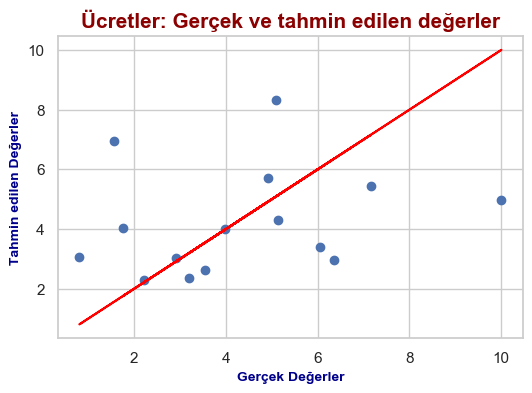

Ortalama Mutlak Hata (MAE)        : 1.971724173731222
Ortalama Kare Hata (MSE)          : 6.64356329099046
Kök Ortalama Kare Hata (RMSE)     : 2.5775110651538355
Ortalama Mutlak Yüzde Hata (MAPE) : 72.30649060810043


In [138]:
X_test = sm.add_constant(X_test)

y_preds = sonuclar.predict(X_test)


baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Ücretler: Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

# Conclusion:


From what we can see above Systemic_crisis is a major cause of banking crisis in Africa. So when govenments and govenment institutions making monetry polices fail there is a very high likelyhood that there will be banking crises in the country.

This is followed by Exchange rate to the US dollar and the rise of inflation in the country

In [ ]:
a=df.sort_values(by=['year'])

fig = px.choropleth(a,locations="cc3",
                    color="exch_usd",animation_frame="year",
                    hover_name="country",color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(title_text = 'Africa Exchange Rates',geo_scope='africa')

In [ ]:
fig = px.choropleth(a,locations="cc3",
                    color="inflation_annual_cpi",animation_frame="year", 
                    hover_name="country",
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(title_text = 'Africa Inflation Situation', geo_scope='africa')

In [ ]:
df_1= df.groupby('country').sum()
df_1['code']= df['cc3'].unique()
df_1['country_name']=df['country'].unique()

In [ ]:
fig = px.choropleth(df_1,locations='code',
                    color="banking_crisis_new",
                    hover_name='country_name',
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(title_text = 'Africa Banking Crisis', geo_scope='africa')

In [ ]:
fig = px.choropleth(df_1,locations='code',
                    color="systemic_crisis",
                    hover_name='country_name',
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(title_text = 'Africa Systemic Crisis', geo_scope='africa')